In [1]:
# set path data from folder in google drive
from google.colab import drive
drive.mount('/content/gdrive')
path_image ='/content/gdrive/My Drive/Project/Image Compression/dog.jpg'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
#Import các thư viện cần thiết
import matplotlib
import numpy as np
import numpy.matlib
import random
import PIL
import os
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Khai báo các thông số của mô hình K-means

k_clusters = 16 # Tổng số các clusters mà chúng ta muốn
max_iter = 50 #Tổng số lần chạy của thuật toán K-means trước khi kết thúc

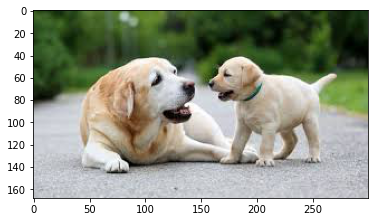

In [4]:
# Đọc hiển thị bức ảnh đầu vào
image = PIL.Image.open(path_image)
matplotlib.pyplot.imshow(image)
image = np.asarray(image)

In [5]:
# Lấy các thông tin của bức ảnh như lấy thông số dòng và thông số cột cũng như chuyển mỗi giá trị pixel về dạng [0,1].
# Chuyển các giá trị pixel về dạng [0,1] giúp thuật toán k-means xử lý hiểu quả hơn.
image_height = image.shape[0]
image_width = image.shape[1]
image = image/255
img_1d = image.reshape(image.shape[0]*image.shape[1],3)
print(img_1d.shape)
print(img_1d)
# Nhận xét, chúng ta có thể thấy ảnh sẽ đưa về 1 danh sách có chiều height x width, mỗi giá trị có 3 thông số tương ứng với 3 giá trị màu RGB


(50400, 3)
[[0.22745098 0.35686275 0.14117647]
 [0.21176471 0.34117647 0.1254902 ]
 [0.18431373 0.31372549 0.09803922]
 ...
 [0.74117647 0.74509804 0.76470588]
 [0.76470588 0.76862745 0.78823529]
 [0.78431373 0.78823529 0.80784314]]


In [6]:
# Hàm khởi tạo ngẫu nghiên giá trị centroids.
# Tham số đầu vào là ảnh X và số lớp clusters K.
def init_centroids_func(img_1d,k_clusters):
    c = random.sample(list(img_1d),k_clusters)
    return c

In [7]:
# Tìm các điểm giá trị pixel gần với mỗi giá trị centroids. 
# Bạn coi công thức Hàm mất mát và bài toán tối ưu ở link sau sẽ hiểu cái công thức toán học ở đây
# https://machinelearningcoban.com/2017/01/01/kmeans/
def closest_centroids(X,c):
    K = np.size(c,0)
    idx = np.zeros((np.size(X,0),1))
    array = np.empty((np.size(X,0),1))
    for i in range(0,K):
        y = c[i]
        temp = np.ones((np.size(X,0),1))*y
        b = np.power(np.subtract(X,temp),2)
        a = np.sum(b,axis = 1)
        a = np.asarray(a)
        a.resize((np.size(X,0),1))
        array = np.append(array, a, axis=1)
    array = np.delete(array,0,axis=1)
    idx = np.argmin(array, axis=1)
    return idx

In [8]:
# Hàm tính toán các giá trị các centroids. 
def compute_centroids(img_1d,idx,k_clusters):
    n = np.size(img_1d,1)
    centroids = np.zeros((k_clusters,n))
    for i in range(0,k_clusters):
        ci = idx ==i
        ci = ci.astype(int)
        total_number = sum(ci);
        ci.resize((np.size(img_1d,0),1))
        total_matrix = np.matlib.repmat(ci,1,n)
        ci = np.transpose(ci)
        total = np.multiply(img_1d,total_matrix)
        centroids[i] = (1/total_number)*np.sum(total,axis=0)
    return centroids

In [9]:
# Hàm chạy thuật toán K-mean, đầu vào là ảnh X sau khi tiền xử lý, các giá trị center được khởi tạo và thông số số vòng lặp chạy thuật toán k-means

In [10]:
# Hàm chạy thuật toán K-mean, đầu vào là ảnh X sau khi tiền xử lý, các giá trị center được khởi tạo và thông số số vòng lặp chạy thuật toán k-means
def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    initial_centroids = init_centroids_func(img_1d,k_clusters)
    m = np.size(img_1d,0)
    n = np.size(img_1d,1)
    K = np.size(initial_centroids,0)
    centroids = initial_centroids
    previous_centroids = centroids
    labels  = np.zeros((m,1))
    for i in range(1,max_iter):
        labels  = closest_centroids(img_1d,centroids)
        centroids = compute_centroids(img_1d,labels ,k_clusters)
    return centroids, labels

In [11]:
# Bắt đầu chạy thuật toán K-means trên bức ảnh đầu vào
# 1. Chạy các thuật toán K-means
centroids,labels = kmeans(img_1d,k_clusters,max_iter)
# Hiện thị kích thước ví dụ số lượng center : vì mình chọn K =16 nên là sẽ 1 vector 16 chiều, và 1 giá trị là 1 mảng chứa giá trị 3 gam màu RGB
print(np.shape(centroids))
print(np.shape(labels))
print("Hiển thị label: ", labels)
print("Hiển thị giá trị centroids :", centroids)

(16, 3)
(50400,)
Hiển thị label:  [7 7 7 ... 9 5 5]
Hiển thị giá trị centroids : [[0.05935876 0.10694709 0.03818755]
 [0.64899681 0.59364048 0.50767377]
 [0.46756555 0.41949839 0.33660053]
 [0.38326777 0.30962805 0.23119051]
 [0.14359604 0.22823555 0.09455054]
 [0.77483088 0.78293124 0.8025686 ]
 [0.66405229 0.65777358 0.63753401]
 [0.21681361 0.32833534 0.14590909]
 [0.94284863 0.93569853 0.92010081]
 [0.72857782 0.73136027 0.74139482]
 [0.77580851 0.6943829  0.59010907]
 [0.48481803 0.63073275 0.28933047]
 [0.55641428 0.50717835 0.43012792]
 [0.31220857 0.4395957  0.19316139]
 [0.86559408 0.79311858 0.70703689]
 [0.82827016 0.83333904 0.846768  ]]


In [12]:
# Đoạn code này sẽ tìm các điểm gần với điểm center và đặt giá trị của center là các giá trị gần trong 1 nhóm đó.
image_compressed = centroids[labels]
print(image_compressed)
image_compressed = np.reshape(image_compressed, (image_height, image_width, 3))
print("Kích thước ảnh sau khi reshape: ", np.shape(image_compressed))

[[0.21681361 0.32833534 0.14590909]
 [0.21681361 0.32833534 0.14590909]
 [0.21681361 0.32833534 0.14590909]
 ...
 [0.72857782 0.73136027 0.74139482]
 [0.77483088 0.78293124 0.8025686 ]
 [0.77483088 0.78293124 0.8025686 ]]
Kích thước ảnh sau khi reshape:  (168, 300, 3)


In [13]:
# Lưu ảnh xuống thành file image sau khi nén
from PIL import Image  
image_compressed = Image.fromarray((image_compressed * 255).astype(numpy.uint8))
image_compressed.save('meo_compression.jpg')

Ảnh sau khi nén pixel


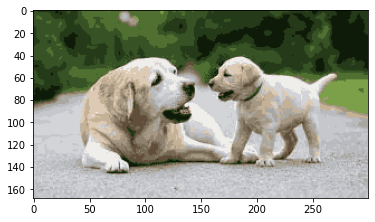

In [14]:
# Show ví dụ thử
import matplotlib
print("Ảnh sau khi nén pixel")
matplotlib.pyplot.imshow(image_compressed)

In [15]:
# Hiển thị kết quả kích thước ảnh đầu vào và ảnh sau khi nén
info = os.stat(path_image)
print("Kích thước ảnh gốc ban đầu: ",info.st_size/1024,"KB")
info = os.stat('meo_compression.jpg')
print("Kích thước ảnh sau khi sử dụng K-mean: ",info.st_size/1024,"KB")
print("Hiển thị labels: ", labels)
print("Hiển thị giá trị centroids :", centroids)

Kích thước ảnh gốc ban đầu:  7.0361328125 KB
Kích thước ảnh sau khi sử dụng K-mean:  10.197265625 KB
Hiển thị labels:  [7 7 7 ... 9 5 5]
Hiển thị giá trị centroids : [[0.05935876 0.10694709 0.03818755]
 [0.64899681 0.59364048 0.50767377]
 [0.46756555 0.41949839 0.33660053]
 [0.38326777 0.30962805 0.23119051]
 [0.14359604 0.22823555 0.09455054]
 [0.77483088 0.78293124 0.8025686 ]
 [0.66405229 0.65777358 0.63753401]
 [0.21681361 0.32833534 0.14590909]
 [0.94284863 0.93569853 0.92010081]
 [0.72857782 0.73136027 0.74139482]
 [0.77580851 0.6943829  0.59010907]
 [0.48481803 0.63073275 0.28933047]
 [0.55641428 0.50717835 0.43012792]
 [0.31220857 0.4395957  0.19316139]
 [0.86559408 0.79311858 0.70703689]
 [0.82827016 0.83333904 0.846768  ]]


KẾT QUẢ CHẠY THUẬT TOÁN KMEANS CỦA THƯ VIỆN SCIKIT-LEARN


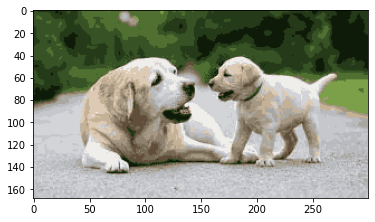

In [17]:
# Thử nghiệm Kmeans của thư viện scikit lean
from sklearn.cluster import KMeans

# chạy thuật toán KMeans sử  dụng thư viện scikit-learn
compressor_kmeans = KMeans(n_clusters=k_clusters, n_init=10, max_iter=max_iter, verbose=0)
compressor_kmeans.fit(img_1d)
pixel_centroid = np.array([list(compressor_kmeans.cluster_centers_[label]) for label in compressor_kmeans.labels_])


# Đưa mảng 1 chiều về dạng ảnh.
pixel_centroids_reshaped = np.reshape(pixel_centroid, (image_height, image_width, 3), "C")


# Lưu ảnh xuống với tên meo_compression_library.jpg
compressed_im_lib = Image.fromarray((pixel_centroids_reshaped * 255).astype(numpy.uint8))
compressed_im_lib.save('meo_compression_library.jpg')


# Hiển thị kết quả sử dụng kmeans của thư viện scikit-learn
print("KẾT QUẢ CHẠY THUẬT TOÁN KMEANS CỦA THƯ VIỆN SCIKIT-LEARN")

matplotlib.pyplot.imshow(image_compressed)
